# Offloading Optimisation

## Import the Libraries

In [1]:
import numpy as np
import sympy as sp
from sympy import symbols
from sympy import diff
import matplotlib.pyplot as plt
import subprocess

def is_latex_installed():
    try:
        subprocess.run(["latex"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        return True
    except FileNotFoundError:
        return False
    
if is_latex_installed():
    D_TOTAL_OLS = (r"$\newcommand{\ols}[1]{\mskip.5\thinmuskip\overline{\mskip-.5\thinmuskip {#1} \mskip-.5\thinmuskip}\mskip.5\thinmuskip}"
                   r"\ols{D}^{Total}$")
    D_TOTAL_OLS_2 = (r"$\newcommand{\ols}[1]{\mskip.5\thinmuskip\overline{\mskip-.5\thinmuskip {#1} \mskip-.5\thinmuskip}\mskip.5\thinmuskip}"
                   r"\ols{D}^{Total''}$")

    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['CMU Serif']
    plt.rcParams['font.size'] = 14
else:
    D_TOTAL_OLS = r"$\overline{D}^{Total}$"
    D_TOTAL_OLS_2 = r"$\overline{D}^{Total''}$"
    
    plt.rcParams['font.size'] = 14

## Define the Symbolic Variables and Constants

In [2]:
p_VNF = symbols('p_VNF', real=True)
lambda_val = symbols('lambda_val')
C_SP = symbols('C_SP')
C_SC = symbols('C_SC')
C_VNF = symbols('C_VNF')
C_PNF = symbols('C_PNF')
C_C = symbols('C_C')
D_SV = symbols('D_SV')
D_SC = symbols('D_SC')
p_N = symbols('p_N')
p_C = symbols('p_C')

## Define the Delays as Functions

In [3]:
D_SP_ = 1 / (C_SP - lambda_val * (1 + p_N * p_VNF + p_C))
D_SC_ = 1 / (C_SC - lambda_val * (1 + p_N * p_VNF + p_C))
D_C_ = 1 / (C_C - lambda_val * p_C) + 2 * D_SC
D_VNF_ = 1 / (C_VNF - lambda_val * p_N * p_VNF) + 2 * D_SV
D_PNF_ = 1 / (C_PNF - lambda_val * p_N * (1 - p_VNF))

D_Total_VNF = 2 * D_SP_ + 2 * D_SC_ + D_VNF_
D_Total_C = 2 * D_SP_ + 2 * D_SC_ + D_C_
D_Total_PNF = D_SP_ + D_PNF_ + D_SC_

D_Total = p_N * p_VNF * D_Total_VNF + p_N * (1 - p_VNF) * D_Total_PNF + p_C * D_Total_C + (1 - p_N - p_C) * (D_SP_ + D_SC_)

## Determine the Formula of $D^{Total}$ With Respect to $p^{VNF}$

In [4]:
D_Total 

p_C*(2*D_SC + 2/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1)) + 2/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1)) + 1/(C_C - lambda_val*p_C)) + p_N*p_VNF*(2*D_SV + 1/(C_VNF - lambda_val*p_N*p_VNF) + 2/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1)) + 2/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))) + p_N*(1 - p_VNF)*(1/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1)) + 1/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1)) + 1/(C_PNF - lambda_val*p_N*(1 - p_VNF))) + (1/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1)) + 1/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1)))*(-p_C - p_N + 1)

## Determine the Formula for the First Derivative of $D^{Total}$ With Respect to $p^{VNF}$

In [5]:
D_Total_first_derivative = diff(D_Total, p_VNF)
D_Total_first_derivative

p_C*(2*lambda_val*p_N/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**2 + 2*lambda_val*p_N/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**2) + p_N*p_VNF*(lambda_val*p_N/(C_VNF - lambda_val*p_N*p_VNF)**2 + 2*lambda_val*p_N/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**2 + 2*lambda_val*p_N/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**2) + p_N*(1 - p_VNF)*(lambda_val*p_N/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**2 + lambda_val*p_N/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**2 - lambda_val*p_N/(C_PNF - lambda_val*p_N*(1 - p_VNF))**2) - p_N*(1/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1)) + 1/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1)) + 1/(C_PNF - lambda_val*p_N*(1 - p_VNF))) + p_N*(2*D_SV + 1/(C_VNF - lambda_val*p_N*p_VNF) + 2/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1)) + 2/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))) + (lambda_val*p_N/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**2 + lambda_val*p_N/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**2)*(-p_C - p_N + 1)

## Determine the Formula for the Second Derivative of $D^{Total}$ With Respect to $p^{VNF}$

In [6]:
D_Total_second_derivative = diff(D_Total_first_derivative, p_VNF)
D_Total_second_derivative

p_C*(4*lambda_val**2*p_N**2/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**3 + 4*lambda_val**2*p_N**2/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**3) + p_N*p_VNF*(2*lambda_val**2*p_N**2/(C_VNF - lambda_val*p_N*p_VNF)**3 + 4*lambda_val**2*p_N**2/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**3 + 4*lambda_val**2*p_N**2/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**3) + p_N*(1 - p_VNF)*(2*lambda_val**2*p_N**2/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**3 + 2*lambda_val**2*p_N**2/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**3 + 2*lambda_val**2*p_N**2/(C_PNF - lambda_val*p_N*(1 - p_VNF))**3) - 2*p_N*(lambda_val*p_N/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**2 + lambda_val*p_N/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**2 - lambda_val*p_N/(C_PNF - lambda_val*p_N*(1 - p_VNF))**2) + 2*p_N*(lambda_val*p_N/(C_VNF - lambda_val*p_N*p_VNF)**2 + 2*lambda_val*p_N/(C_SP - lambda_val*(p_C + p_N*p_VNF + 1))**2 + 2*lambda_val*p_N/(C_SC - lambda_val*(p_C + p_N*p_VNF + 1))**2) + (2*lambda_val**2*p_N**2/(C_SP - lambda_val*(

## Define the Actual Values

In [7]:
actual_values = {
    lambda_val: 25, # Packet arrival rate (λ)
    C_SP: 400,      # Service rate at SP (C^SP)
    C_SC: 400,      # Service rate at SC (C^SC)
    C_VNF: 80,      # Service rate at VNF (C^VNF)
    C_PNF: 20,      # Service rate at PNF (C^PNF)
    C_C: 10,        # Service rate at controller (C^C)
    D_SV: 0.0422,   # Propagation delay at VNF (D^SV)
    D_SC: 0.1876,   # Propagation delay at controller (D^SC)
    p_N: 0.7553,    # Probability of redirecting to network function (p^N) 
    p_C: 0.5602     # Probability of redirecting to controller (p^C) 
}

## Determine the Formula of the First Derivative With Substituted Parameters

In [8]:
D_Total_first_derivative_substituted = D_Total_first_derivative.subs(actual_values)
D_Total_first_derivative_substituted

0.7553*p_VNF*(0.000579584965487034/(1 - 0.052306818653998*p_VNF)**2 + 0.002950390625/(1 - 0.23603125*p_VNF)**2) + 0.7553*(1 - p_VNF)*(-0.0529590891036674/(p_VNF + 0.0591817820733483)**2 + 0.000289792482743517/(1 - 0.052306818653998*p_VNF)**2) + 0.06374732 - 0.7553/(18.8825*p_VNF + 1.1175) + 1.5106/(360.995 - 18.8825*p_VNF) + 0.7553/(80 - 18.8825*p_VNF) + 0.000233253969360257/(1 - 0.052306818653998*p_VNF)**2

## Determine the Formula of the Second Derivative With Substituted Parameters

In [9]:
D_Total_second_derivative_substituted = D_Total_second_derivative.subs(actual_values)
D_Total_second_derivative_substituted

0.7553*p_VNF*(6.06324913686279e-5/(1 - 0.052306818653998*p_VNF)**3 + 0.00139276877441406/(1 - 0.23603125*p_VNF)**3) + 0.7553*(1 - p_VNF)*(0.105918178207335/(p_VNF + 0.0591817820733483)**3 + 3.0316245684314e-5/(1 - 0.052306818653998*p_VNF)**3) + 0.08/(p_VNF + 0.0591817820733483)**2 + 0.000437760524432357/(1 - 0.052306818653998*p_VNF)**2 + 2.44015461513043e-5/(1 - 0.052306818653998*p_VNF)**3 + 0.004456860078125/(1 - 0.23603125*p_VNF)**2

## Calculate $D^{Total}$ for $p^{VNF}$ $\in [0,1]$ With Actual Values

In [10]:
# Function to compute D_Total with actual values
def D_Total_function(p_VNF_value):
    return D_Total.subs({**actual_values, p_VNF: p_VNF_value}).evalf()

# Generate p_VNF values from 0 to 1
p_VNF_values = np.linspace(0, 1, 1000)

# Calculate D_Total for these values
D_Total_values = [D_Total_function(val) for val in p_VNF_values]

## Plot $D^{Total}$ vs $p^{VNF}$

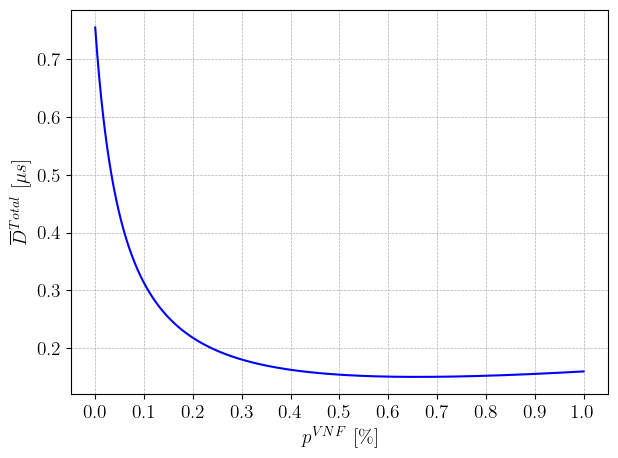

In [11]:
plt.plot(p_VNF_values, D_Total_values, label=D_TOTAL_OLS, color='blue')
# plt.title(D_TOTAL_OLS + " vs $p^{VNF}$")
plt.xlabel('$p^{VNF}~[\%]$')
plt.ylabel(D_TOTAL_OLS + " [$\mu s$]")

plt.grid(linestyle='--', linewidth=0.5)
plt.xticks(np.arange(min(p_VNF_values), max(p_VNF_values) + 0.1, 0.1))

# plt.legend()
plt.tight_layout()
plt.savefig('fig/d_total.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

## Convexity Validation

Visual inspection of the $D^{Total}$ function can give hints about convexity (or concavity), but it is not a definitive method. A curve that appears to be "bowl-shaped" or "U-shaped" might be convex, while one that appears "dome-shaped" or "n-shaped" might be concave.

Given our function is a single-variable function, we resort to **Second Derivative Test** to rigorously assess its convexity:
 - For a single-variable function $f(x)$, if its second derivative $f''(x)$ is positive for all $x$ in an interval, then $f(x)$ is convex on that interval. 
 - Conversely, if $f''(x)$ is negative for all $x$ in an interval, then $f(x)$ is concave on that interval.

To determine the convexity of the function, we employ two distinct methodologies:

### Direct Interval Check

In this approach, the convexity of the function is assessed directly over the entire interval of interest, [0,1], for the parameter $ p^{\text{VNF}} $ at a set of predetermined check points spanning the interval [0,1]. These points were spaced at regular intervals of 0.1.

In [12]:
# Function to compute the second derivative with actual values
def D_Total_second_derivative_function(p_VNF_value):
    return D_Total_second_derivative.subs({**actual_values, p_VNF: p_VNF_value}).evalf()

# Calculate the second derivative for these values
D_Total_second_derivative_values = [D_Total_second_derivative_function(val) for val in p_VNF_values]

# Check convexity over the interval [0,1]
check_points = [i * 0.1 for i in range(11)]
is_positive_over_interval = all(D_Total_second_derivative_function(point) > 0 for point in check_points)

print("The second derivative is {}positive for the entire interval [0,1].".format("" if is_positive_over_interval else "NOT "))

The second derivative is positive for the entire interval [0,1].


### Root-based Interval Check

This method offers a more granular analysis of the function's behavior by pinpointing specific sub-intervals where it exhibited convexity or concavity. The steps involved were:
 - Identifying potential roots where the second derivative changed its sign. These roots served as markers, indicating points where the function might transition from being convex to concave, or vice versa.
 - Dividing the interval [0,1] into smaller sub-intervals based on these roots.
 - Classifying each sub-interval as either convex or concave based on the sign of the second derivative at the midpoint of that interval. If the second derivative was positive at the midpoint, the interval was classified as convex.
 - After classification, a determination was made on whether the function was convex over the entire interval [0,1] based on the convexity of these sub-intervals.

In [13]:
from scipy.optimize import brentq

# Identify potential roots where the second derivative changes its sign
roots = [
    brentq(D_Total_second_derivative_function, p_VNF_values[i-1], p_VNF_values[i])
    for i in range(1, len(D_Total_second_derivative_values))
    if np.sign(D_Total_second_derivative_values[i-1]) != np.sign(D_Total_second_derivative_values[i])
]

# Construct intervals based on the identified roots
if roots:
    intervals = [(0, roots[0])] + [(roots[i], roots[i+1]) for i in range(len(roots)-1)] + [(roots[-1], 1)]
else:
    intervals = [(0, 1)]

# Classify intervals as convex or concave
convex_intervals = [interval for interval in intervals if D_Total_second_derivative_function(sum(interval)/2) > 0]
is_all_intervals_convex = len(convex_intervals) == len(intervals)

print("The function is {}convex for the entire interval [0,1].".format("" if is_all_intervals_convex else "NOT "))

if not is_all_intervals_convex:
    print("Intervals where the function is convex:", convex_intervals)

The function is convex for the entire interval [0,1].


By employing these two methodologies, a comprehensive understanding of the convexity behavior of the system's performance function over the range of $ p_{\text{VNF}} $ was achieved. The Direct Interval Check provided a quick confirmation, while the Root-based Interval Check offered detailed insights into specific regions of convexity.

In conclusion, we found that the second derivative of the $D^{\text{Total}}$ function with respect to $p^{\text{VNF}}$ is positive for all values in the interval [0,1]. This implies that the function is convex over this interval.

Here is the plot of the second derivative of the function with respect to $p_{VNF}$ over the interval [0,1]. 
As we can observe, the second derivative remains positive throughout the interval, 
further supporting the conclusion that the function is convex over this range.

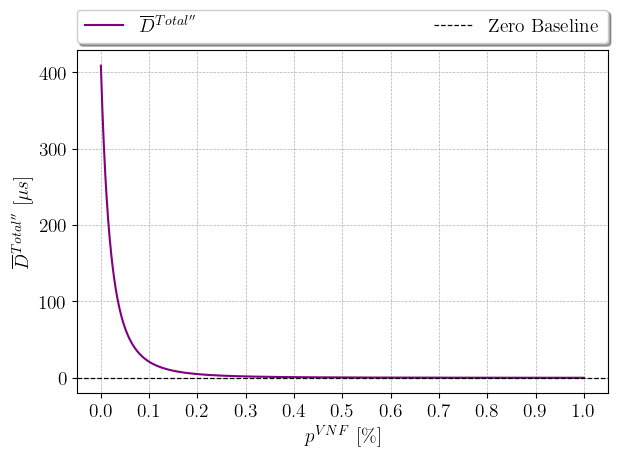

In [14]:
plt.plot(p_VNF_values, D_Total_second_derivative_values, label=D_TOTAL_OLS_2, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.9, label = "Zero Baseline")  # Adding y=0 line for reference
# plt.title(D_TOTAL_OLS_2 + " vs $p^{VNF}$")
plt.xlabel("$p^{VNF}~[\%]$")
# plt.ylabel("$D^{Total''}$")
plt.ylabel(D_TOTAL_OLS_2 + " [$\mu s$]")

plt.grid(linestyle='--', linewidth=0.5)

plt.legend(
               bbox_to_anchor=(0., 1.02, 1., .102),
               loc='lower left',
               ncol=3,
               mode="expand",
               borderaxespad=0.,
               fancybox=True,
               shadow=True)

# Setting the x-ticks every 0.1
plt.xticks(np.arange(min(p_VNF_values), max(p_VNF_values) + 0.1, 0.1))
# plt.legend()
plt.tight_layout()
plt.savefig('fig/d_total_2.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Note

In performing convex optimization (i.e., trying to minimize a function), we'd ideally want that function to be convex. However, some functions, especially under different parameter configurations, may exhibit regions of both convexity and concavity over the domain [0, 1]. Additionally, not all its points might be positive. 

However, just because a function has concave regions or regions with negative points doesn't mean it can't also be used in a convex optimization problem. If, over the domain of interest, the function behaves convexly (even if it has concave regions elsewhere), then it's still suitable for convex optimization. For convex problems, any local minimum is also a global minimum, which makes them particularly amenable to various optimization techniques. Essentially, given separate convex intervals, to determine the global minimum across the entire domain, we first identify the local minima within each interval. Then, the smallest among them will be the global minimum.

## Convex Optimisation

For our global minimization task, we've opted for the Bounded version of Brent's method. Brent's method is renowned in the realm of root-finding algorithms, seamlessly merging the techniques of bisection, secant method, and inverse quadratic interpolation. One of the method's prime advantages is its ability to converge more rapidly than with the bisection method alone. This enhanced convergence rate can be attributed to its judicious incorporation of the faster secant and inverse quadratic interpolation techniques. However, in situations where these methods risk instability, Brent's defaults to the bisection method, thereby ensuring stability and robustness.

A notable limitation of the classical Brent's method is that while it facilitates an initial bracketing interval, it does not guarantee confinement of the solution within this bracket. Addressing this, the Bounded version of Brent's method was developed. While it retains the foundational principles of the original, this variant guarantees that, throughout its computation, the proposed solutions adhere strictly to user-defined bounds.

The termination criteria for this optimization process primarily hinges on the variance between successive iterations. Specifically, when the disparity between current and previous minimum estimates falls beneath a defined tolerance, the algorithm terminates. For the Bounded method, this default tolerance is set at \(1e-5\).

The utility of the Bounded version of Brent's method is evident in scenarios where domain knowledge indicates a solution's boundary or when exceeding specific constraints is untenable, either due to physical limitations or crucial safety protocols. In such contexts, the Bounded approach offers a more tailored and reliable solution.

In [15]:
from scipy.optimize import minimize_scalar

convex_intervals = [(0,1)]

# Searching for global minimum within the convex region using minimize_scalar with Brent's method
for region in convex_intervals:
    # result = minimize_scalar(lambda p: float(D_Total_function(p)), bracket=region, method='Brent') 
    result = minimize_scalar(lambda p: float(D_Total_function(p)), bounds=region, method='bounded') # options={'xatol': 1e-5}
    
print(result)

print(f"\nWithin the interval {region}, the function D^Total attains its minimum value of {result.fun} at the point p = {result.x}.")

 message: Solution found.
 success: True
  status: 0
     fun: 0.15049005630637555
       x: 0.6597640683521798
     nit: 10
    nfev: 10

Within the interval (0, 1), the function D^Total attains its minimum value of 0.15049005630637555 at the point p = 0.6597640683521798.


## Visualize $D_{Total}$, Region of Interest, and Global Minimum

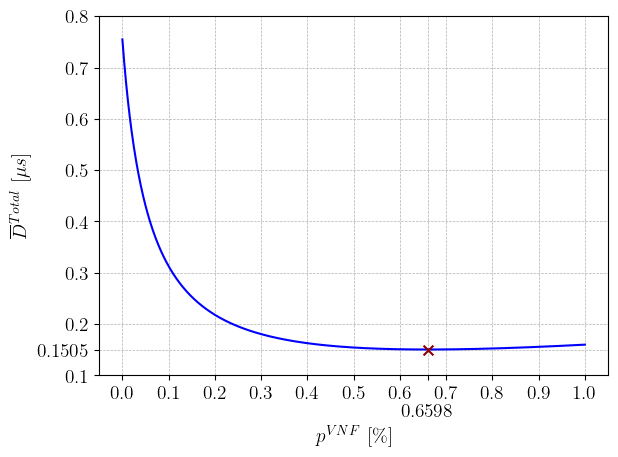

In [16]:
# Comprehensive visualization with the second derivative in the legend
plt.figure()

# Plotting D_Total function on the primary y-axis
plt.plot(p_VNF_values, D_Total_values, linestyle='-', label=D_TOTAL_OLS, color='blue')
plt.xlabel('$p^{VNF}~[\%]$')
plt.ylabel(D_TOTAL_OLS + " [$\mu s$]")
plt.grid(linestyle='--', linewidth=0.5)

# Setting custom x-axis ticks
plt.xticks([i/10 for i in range(0, 11)])

# Marking the identified global minimum
plt.scatter(result.x, result.fun, marker='x', color='darkred', s=50, zorder=5, label='Global Minimum')
# plt.axvline(result.x, color='black', linestyle='--', linewidth=0.8)
# plt.axhline(y=result.fun, color='black', linestyle='--', linewidth=0.8)

# plt.legend(loc="upper right")

# Adjusting x-axis ticks
current_x_ticks = plt.xticks()[0]
current_x_labels = [str(tick) for tick in current_x_ticks]

if result.x not in current_x_ticks:
    current_x_ticks = np.append(current_x_ticks, result.x)
    current_x_labels.append(f"{result.x:.4f}")  # 4 decimal places, adjust as needed

plt.xticks(current_x_ticks, current_x_labels)

# Adjusting y-axis ticks
current_ticks = plt.yticks()[0]
current_labels = [str(round(tick, 2)) for tick in current_ticks]  # rounding to 2 decimal places

if result.fun not in current_ticks:
    current_ticks = np.append(current_ticks, result.fun)
    current_labels.append(f"{result.fun:.4f}")  # 4 decimal places, adjust as needed

plt.yticks(current_ticks, current_labels)

# Adjust the vertical position of the label corresponding to global_minimum_interval_point
xticklabels = plt.gca().get_xticklabels()
for label in xticklabels:
    if label.get_text() == f"{result.x:.4f}":  # 4 decimal places, adjust as needed
        label.set_position((label.get_position()[0], label.get_position()[1] - 0.05))  # Adjust -0.05 as required

# Display the plot
plt.tight_layout()
plt.savefig('fig/d_total_glob_min.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

The optimization was successful. The results indicate the following:
 - The optimal value for p VNF that minimizes the total delay is approximately 0.6598. This suggests that about 65.98% of the packets should be offloaded to the VNF to minimize the total delay.
 - The minimum total delay achieved with this optimal p VNF value is approximately 0.1505 microseconds.

This outcome suggests that, under the provided system model and the realistic bounds we've considered, offloading a portion of the traffic to the VNF is justifiable from a delay minimization perspective.

## Visualize $D_{Total}$, its Second Derivative, Region of Interest, and Global Minimum

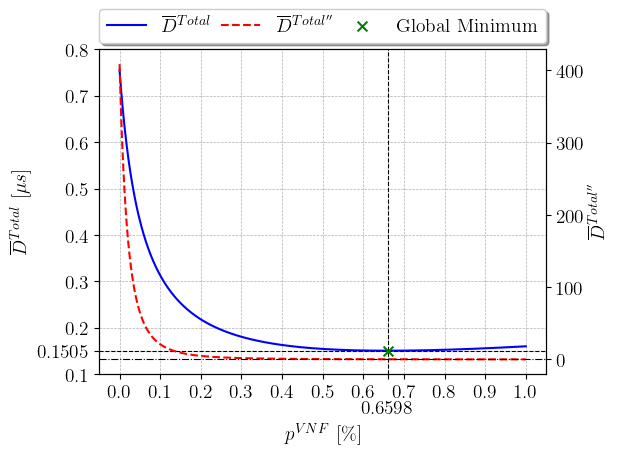

In [17]:
# from matplotlib.ticker import FormatStrFormatter

# Comprehensive visualization with the second derivative in the legend
fig, ax1 = plt.subplots()

# Plotting D_Total function on the primary y-axis
ax1.plot(p_VNF_values, D_Total_values, linestyle='-', label=D_TOTAL_OLS, color='blue')
# ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xlabel('$p^{VNF}~[\%]$')
ax1.set_ylabel(D_TOTAL_OLS + " [$\mu s$]", color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.grid(linestyle='--', linewidth=0.5)

# Setting custom x-axis ticks
ax1.set_xticks([i/10 for i in range(0, 11)])

# Creating a secondary y-axis for the second derivative
ax2 = ax1.twinx()
ax2.plot(p_VNF_values, D_Total_second_derivative_values, linestyle='--', label=D_TOTAL_OLS_2, color='red')
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.axhline(y=0, color='black', linestyle='-.', linewidth=0.8)  # Adding y=0 line for reference
ax2.set_ylabel(D_TOTAL_OLS_2, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# # Get the current limits
# y1_lim = ax1.get_ylim()
# y2_lim = ax2.get_ylim()

# # Adjust limits
# ax1.set_ylim(0, max(y1_lim[1], y1_lim[1] - y1_lim[0]))
# ax2.set_ylim(0, max(y2_lim[1], y2_lim[1] - y2_lim[0]))

# Adding shading for the interval of interest separately
# ax1.axvspan(convex_intervals[0][0], convex_intervals[0][1], color='green', alpha=0.1, label='Interval of Interest')

# Marking the identified global minimum
ax1.scatter(result.x, result.fun, marker='x', color='green', s=50, zorder=5, label='Global Minimum')
ax1.axvline(result.x, color='black', linestyle='--', linewidth=0.8)
ax1.axhline(y=result.fun, color='black', linestyle='--', linewidth=0.8)

# # Combining legends from both axes and ordering them
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# # Manually order the lines and labels
ordered_lines = [lines1[0], lines2[0], lines1[1]]
ordered_labels = [labels1[0], labels2[0], labels1[1]]

# ax2.legend(ordered_lines, ordered_labels, loc="upper left")

plt.legend(ordered_lines, ordered_labels,
               bbox_to_anchor=(0., 1.02, 1., .102),
               loc='lower left',
               ncol=3,
               mode="expand",
               borderaxespad=0.,
               fancybox=True,
               shadow=True)

# Get current x-axis ticks and labels
current_x_ticks = ax1.get_xticks()
current_x_labels = [str(tick) for tick in current_x_ticks]

# Check if the global_minimum_interval_point value is already in the ticks, if not, append it
if result.x not in current_x_ticks:
    current_x_ticks = np.append(current_x_ticks, result.x)
    current_x_labels.append(f"{result.x:.4f}")  # 4 decimal places, adjust as needed

# Set the updated x-axis ticks and labels
ax1.set_xticks(current_x_ticks)
ax1.set_xticklabels(current_x_labels)

# Get the tick labels of the x-axis
xticklabels = ax1.get_xticklabels()

# Adjust the vertical position of the label corresponding to global_minimum_interval_point
for label in xticklabels:
    if label.get_text() == f"{result.x:.4f}":  # 4 decimal places, adjust as needed
        label.set_position((label.get_position()[0], label.get_position()[1] - 0.05))  # Adjust -0.05 as required

# Get current y-axis ticks and labels
current_ticks = ax1.get_yticks()
current_labels = [str(round(tick, 2)) for tick in current_ticks]  # rounding to 2 decimal places

# Check if minimum value is already in the ticks, if not, append it
if result.fun not in current_ticks:
    current_ticks = np.append(current_ticks, result.fun)
    current_labels.append(f"{result.fun:.4f}")  # 4 decimal places, adjust as needed

# Set the updated y-axis ticks and labels
ax1.set_yticks(current_ticks)
ax1.set_yticklabels(current_labels)

# Setting the title and showing the plot
# plt.title(f"Visualization of {D_TOTAL_OLS}, {D_TOTAL_OLS_2}, and Global Minimum")
fig.tight_layout()
plt.savefig('fig/d_total_2_glob_min.png', format='png', dpi=300, bbox_inches='tight')
plt.show()